We use gdown library to download dataset from my google drive

In [1]:
# import gdown

# dataset_url = 'https://drive.google.com/drive/u/1/home'
# file_name = 'train1.csv'

# gdown.download(dataset_url, file_name)

Csv file has downloaded successfully and I have named it as train1.csv 

<h1>To preprocess data </h1>

        we need numpy and pandas library

In [2]:
# importing numpy and pandas
import pandas as pd 
import numpy as np

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


Lets see the information the dataset trying to provide.


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [5]:
# Statistical status of the dataframe 
train_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [6]:
# Lets see if the dataset contains missing values or not

train_df.isnull()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
88853,False,False,False,False,False,False,False,False,False,False
88854,False,False,False,False,False,False,False,False,False,False
88855,False,False,False,False,False,False,False,False,False,False
88856,False,False,False,False,False,False,False,False,False,False


In [7]:
train_df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [8]:
# Fill Number_Weeks_Used column with mode
train_df['Number_Weeks_Used'].fillna(train_df['Number_Weeks_Used'].mode()[0], inplace=True)

/tmp/ipykernel_10387/523456268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Number_Weeks_Used'].fillna(train_df['Number_Weeks_Used'].mode()[0], inplace=True)


In [9]:
train_df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [10]:
train_df['Number_Weeks_Used'].unique().size

64

In [11]:
train_df['Number_Weeks_Used'][:10]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5    20.0
6    20.0
7     0.0
8     0.0
9     0.0
Name: Number_Weeks_Used, dtype: float64

In [12]:
len(train_df['Number_Weeks_Used'])

88858

it seems that 9000 out of 88858 in Number_Weeks_Used column has a missing value.

In [13]:
# nunique() counts and returns the total number of unique values for each column
train_df.nunique()


ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
dtype: int64

To understand more, you can see that Id column returns total length because id is always unique.

crop_type has returns just 2 because there is only 2 values i.e 0 and 1.

In [14]:
train_df['ID'].unique()

array(['F00000001', 'F00000003', 'F00000004', ..., 'F00155939',
       'F00155942', 'F00155945'], dtype=object)

In [15]:
# we dont need id column it is better we drop it

train_df = train_df.drop('ID', axis=1)
train_df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


### Let's have a depth look in fetures wheather it is nominal, ordinal, binary, 


In [16]:
# def get_categories_types(data):
#     nominal = []
#     oridial = []
#     binary = []
#     discrete = []

#     for column in data.columns:
#         unique_column = data.column.unique()
#         size_of_unique_column = len(unique_column)

#         if size_of_unique_column <10:
#             oridial.append(column)

#         if size_of_unique_column==2:
#             binary.append(column)

#         if size_of_unique_column >=2 and size_of_unique_column >=10:
#             nominal.append(column)

#         else:
#             discrete.append(column)

#     return nominal, oridial, binary, discrete




In [17]:
# categories = get_categories_types(train_df)
# print("Ordinal Categories:", categories['ordinal'])
# print("Nominal Categories:", categories['nominal'])
# print("Binary Categories:", categories['binary'])
# print("Discrete Categories:", categories['discreate'])


Giving Pesticide_Use_Category 1 to 'Never', 2 to 'Previously used', 3 to 'Currently Using'

In [18]:
# train_df['Pesticide_Use_Category'] = train_df['Pesticide_Use_Category'].replace({1 : 'Never', 
#                                                        2 : 'Previously used', 
#                                                        3 : 'Currently Using'})

In [19]:
train_df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


<h3>Pesticide_Use_Category</h3>

In [20]:
train_df['Pesticide_Use_Category'].value_counts()

Pesticide_Use_Category
2    63709
3    24312
1      837
Name: count, dtype: int64

<h3>Number_Doses_Week</h3>

In [21]:
train_df['Number_Doses_Week'].value_counts()

Number_Doses_Week
20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: count, dtype: int64

In [22]:
train_df['Crop_Type'].value_counts()

Crop_Type
0    63589
1    25269
Name: count, dtype: int64

In [23]:
# lets see how crop_type ffects crop damage

train_df.groupby('Crop_Type')['Crop_Damage'].mean()

Crop_Type
0    0.195285
1    0.178677
Name: Crop_Damage, dtype: float64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

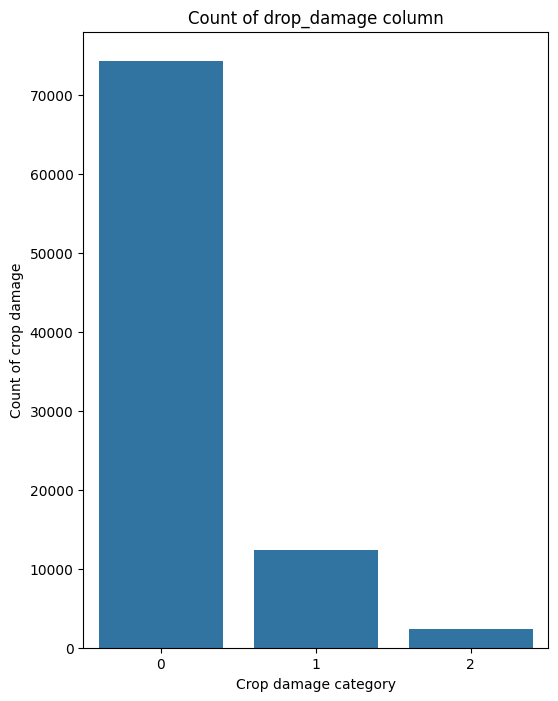

Crop_Damage
0    74238
1    12307
2     2313
Name: count, dtype: int64
0 for alive 	 1 for damage 	 2 for damage due to presticides


In [25]:
# Lets see crop_damage column
plt.figure(figsize=(6,8))
sns.countplot(x = 'Crop_Damage', data=train_df)
plt.title('Count of drop_damage column')
plt.xlabel('Crop damage category')
plt.ylabel('Count of crop damage')
plt.show()

print(train_df['Crop_Damage'].value_counts())

print('0 for alive \t 1 for damage \t 2 for damage due to presticides')

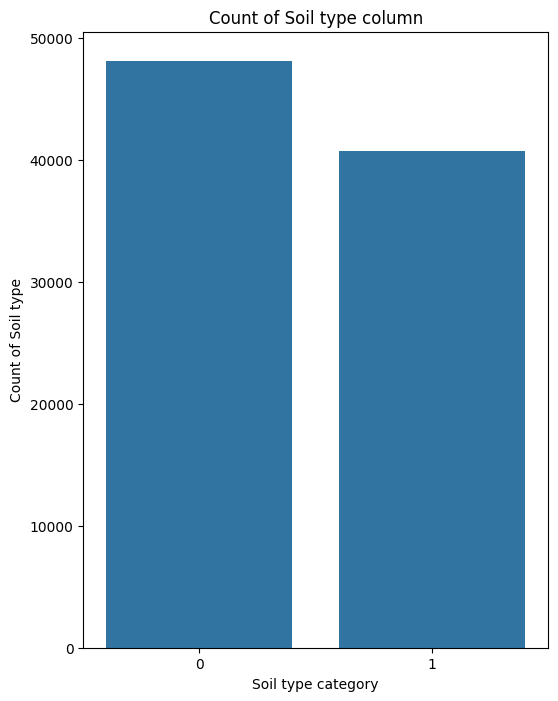

Soil_Type
0    48124
1    40734
Name: count, dtype: int64


In [26]:
# Lets see Soil_type  column
plt.figure(figsize=(6,8))
sns.countplot(x = 'Soil_Type', data=train_df)
plt.title('Count of Soil type column')
plt.xlabel('Soil type category')
plt.ylabel('Count of Soil type')
plt.show()
print(train_df['Soil_Type'].value_counts())

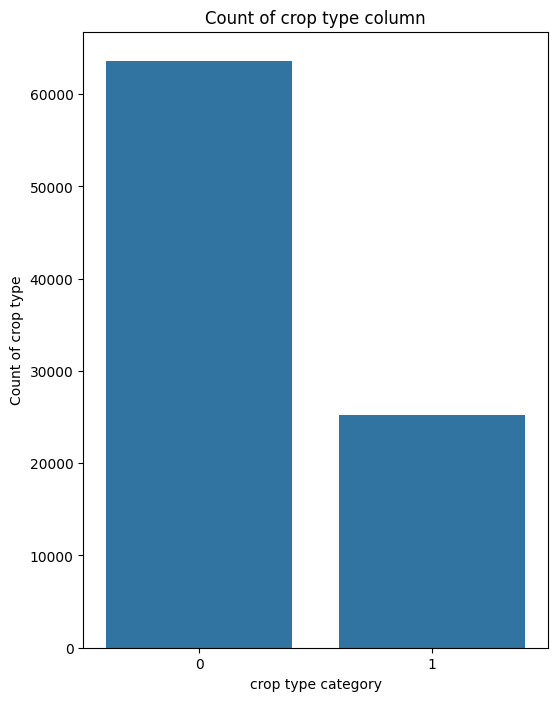

Crop_Type
0    63589
1    25269
Name: count, dtype: int64


In [27]:
# Lets see Crop_type  column
plt.figure(figsize=(6,8))
sns.countplot(x = 'Crop_Type', data=train_df)
plt.title('Count of crop type column')
plt.xlabel('crop type category')
plt.ylabel('Count of crop type')
plt.show()
print(train_df['Crop_Type'].value_counts())

In [28]:
def univariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)

    # Get value counts
    value_counts = data[xlabel].value_counts()
    ax = value_counts.plot.bar(
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    total = value_counts.sum()
    # Add percentage label for each plot
    for plot in ax.patches:
        height = plot.get_height()
        ax.annotate(
            # Percentage label text
            f"{height / total * 100:.1f}%",
            xy=(
                # Percentage label x co-ordinate
                plot.get_x() + plot.get_width() / 2.,
                # Percentage label y co-ordinate
                height,
            ),
            # Percentage label horizontal align
            ha="center",

        )

    ax.set_title(f"Distribution of {xlabel} in the dataset", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

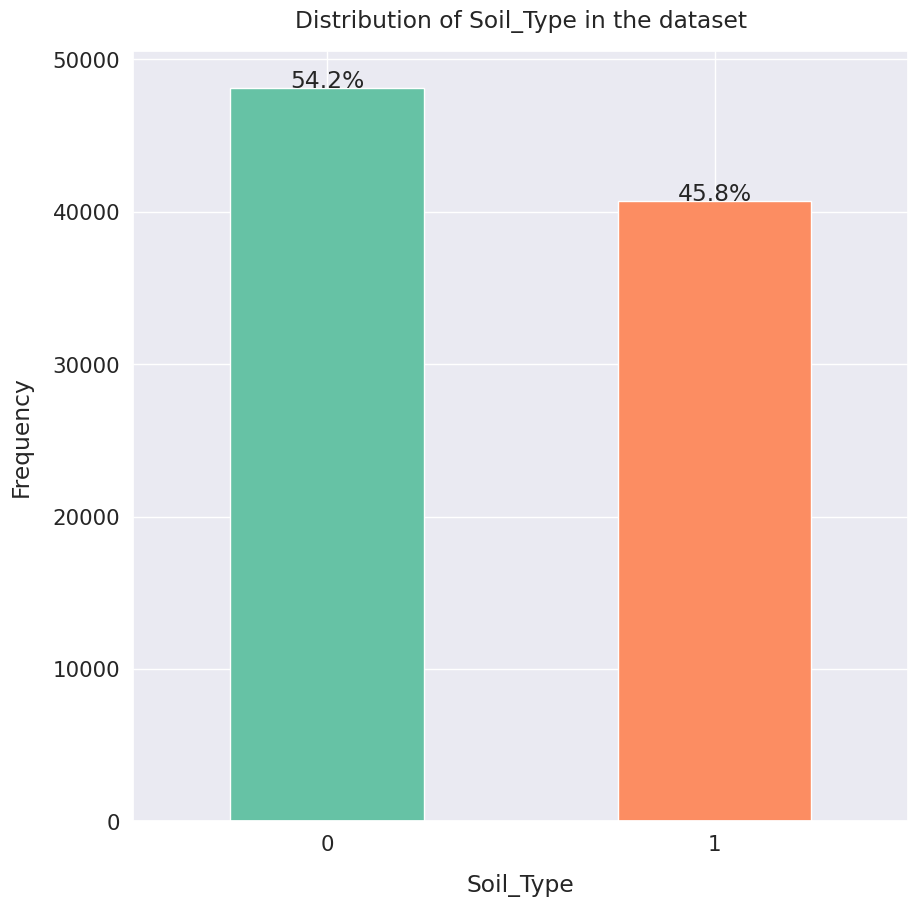

In [29]:
univariate_barplot(train_df, 'Soil_Type')

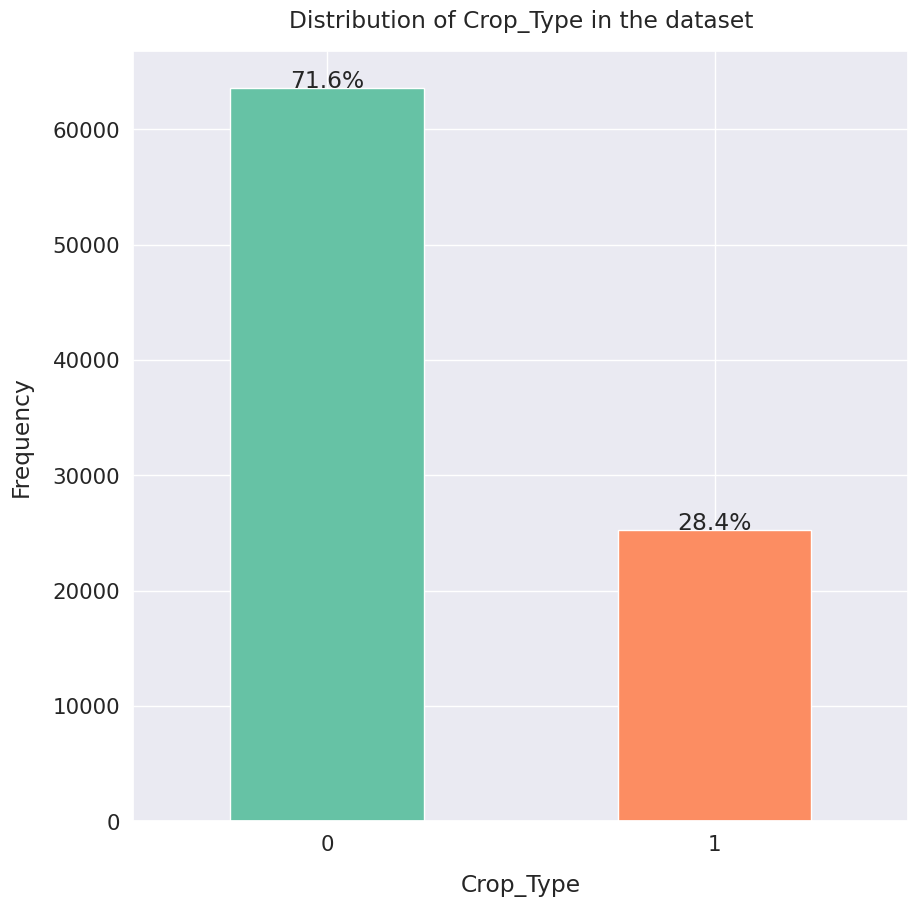

In [30]:
univariate_barplot(train_df, 'Crop_Type')

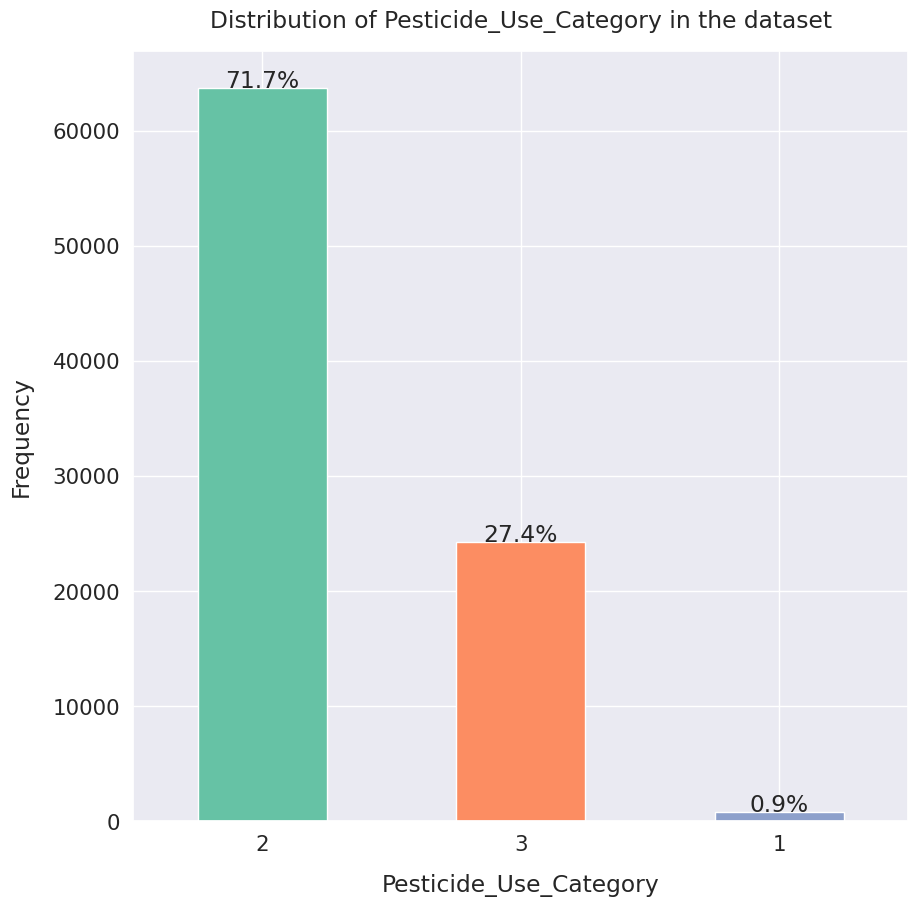

In [31]:
univariate_barplot(train_df, 'Pesticide_Use_Category')

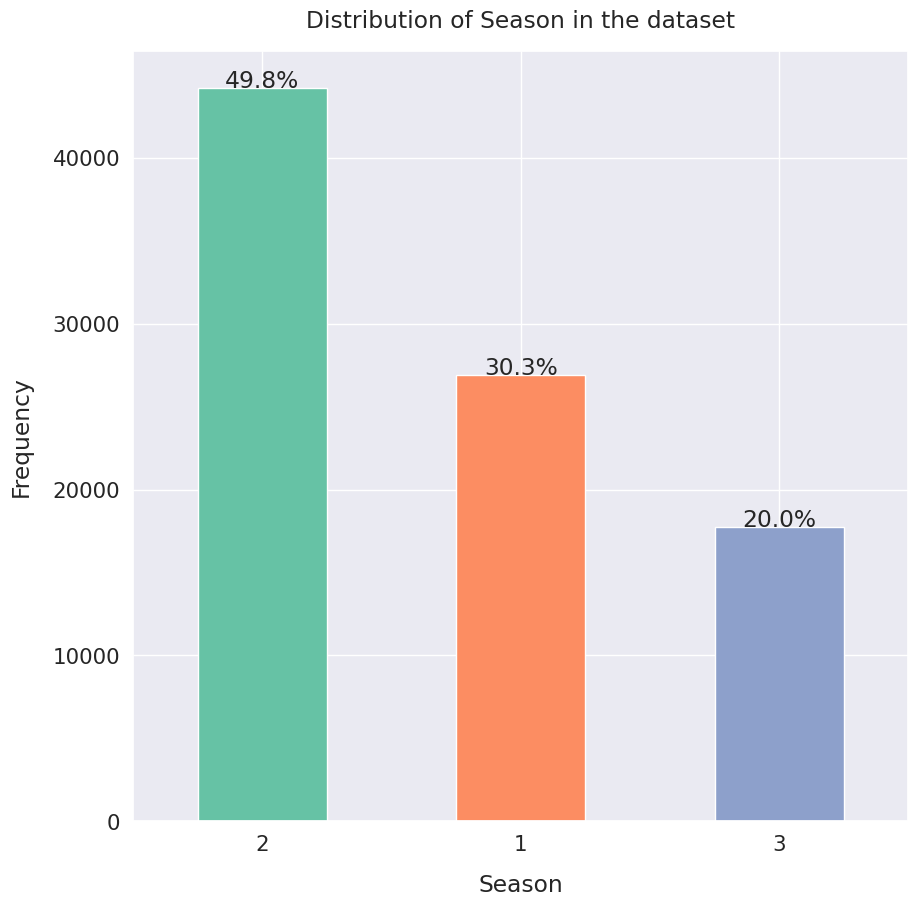

In [32]:
univariate_barplot(train_df, 'Season')


Let's make a visualization similar to our univariate analysis but with the added information of the target variable distribution.

In [33]:
def bivariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)

    ax = train_df.groupby([xlabel, "Crop_Damage"]).size().unstack().plot.bar(
        stacked=True,
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    ax.set_title(f"Distribution of {xlabel} with respect to the stroke", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

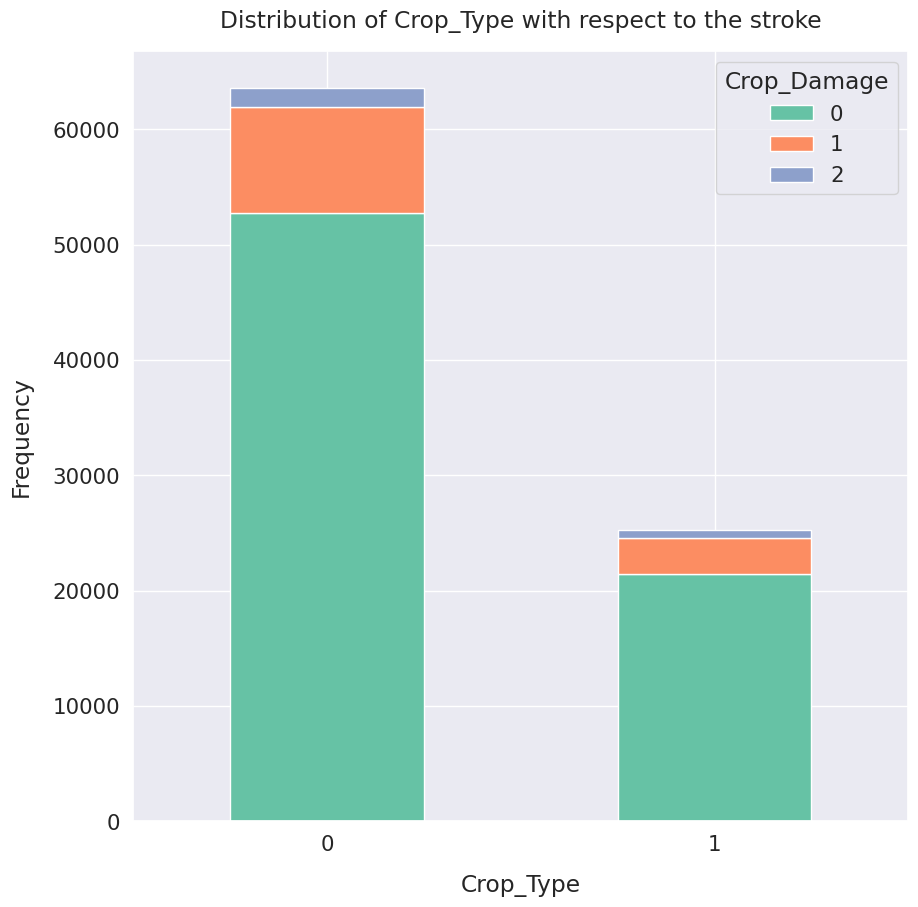

In [34]:
bivariate_barplot(train_df, 'Crop_Type')

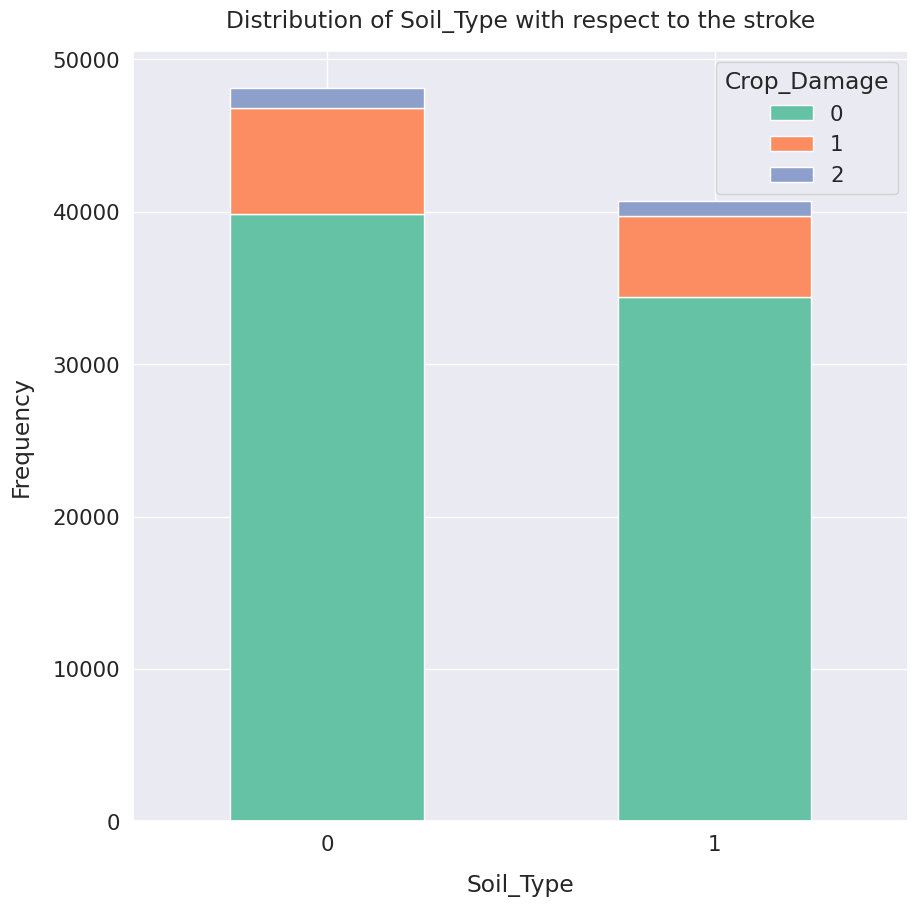

In [35]:
bivariate_barplot(train_df, 'Soil_Type')

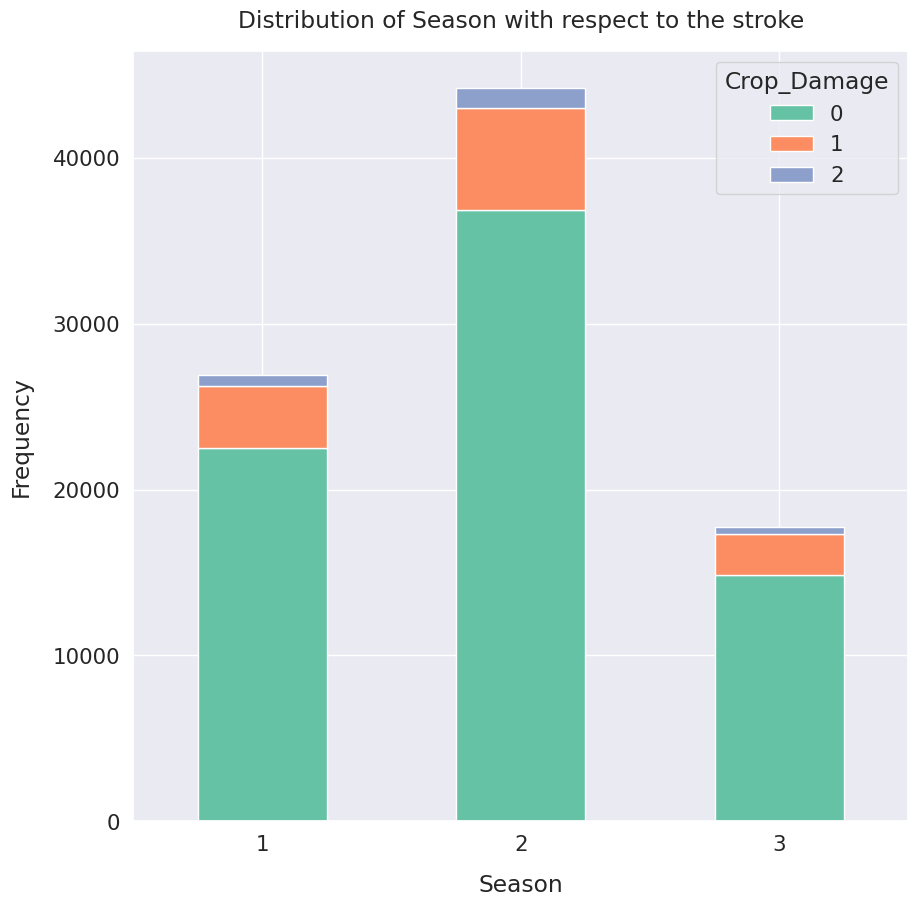

In [36]:
bivariate_barplot(train_df, 'Season')

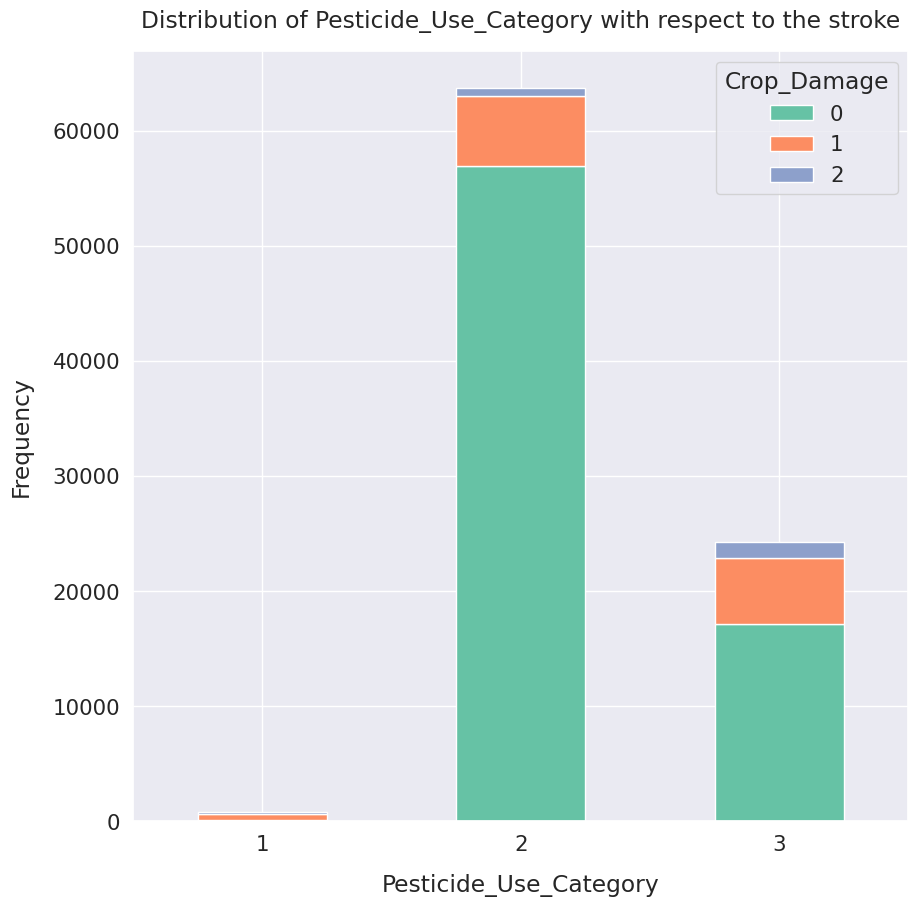

In [37]:
bivariate_barplot(train_df, 'Pesticide_Use_Category')

In [38]:
feature_impact = train_df.groupby('Season')['Crop_Damage'].agg(['sum', 'size'])
feature_impact

,sum,size
Season,,
1,5070,26902
2,8543,44210
3,3320,17746


In [39]:
feature_impact_probability = feature_impact['sum'] / feature_impact['size'] * 100
feature_impact_probability

Season
1    18.846182
2    19.323682
3    18.708441
dtype: float64

In [40]:
def calculate_feature_impact_probability(data, feature, label="Crop_Damage"):
    feature_impact = train_df.groupby(feature)[label].agg(["sum", "size"])
    feature_impact_probability = feature_impact["sum"] / feature_impact["size"] * 100
    return feature_impact_probability


In [41]:
calculate_feature_impact_probability(train_df, 'Crop_Type')

Crop_Type
0    19.528535
1    17.867743
dtype: float64

In [42]:
# Coorelation of the datasets

train_df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.404464,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041473,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.063444,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.319399,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.116879,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.404464,-0.041473,-0.063444,0.319399,0.116879,1.000000,-0.415646,0.003614,0.213591
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.415646,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.003614,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.213591,-0.133117,-0.000184,1.000000


In [43]:
# taking train_df in new_df
new_df= train_df

In [44]:
new_df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [45]:
new_df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [46]:
categorical_features=['Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Season']

In [47]:
numerical_features=['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Quit']

Lets check the distribution of the skewness

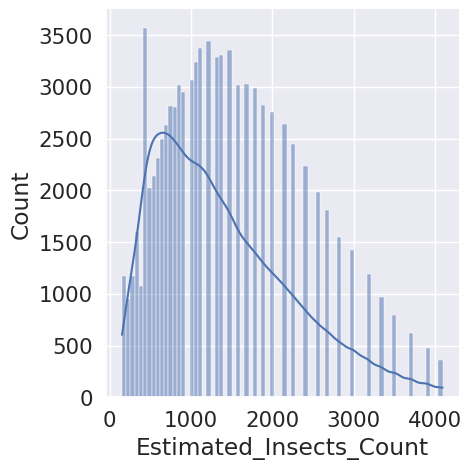

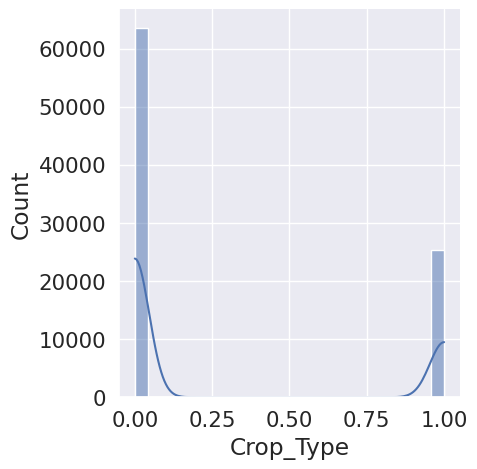

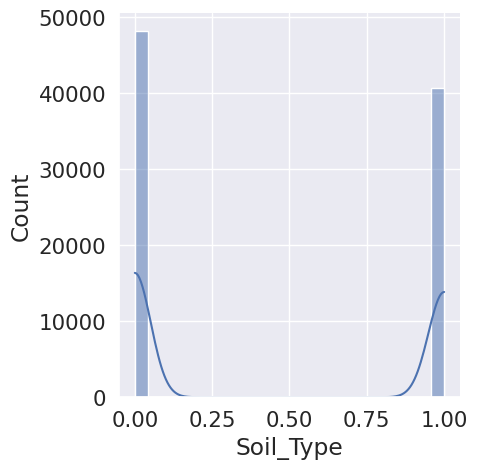

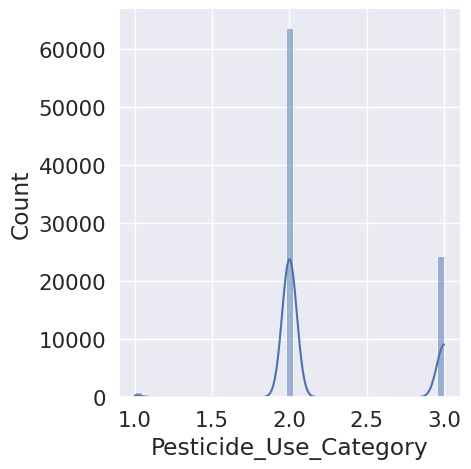

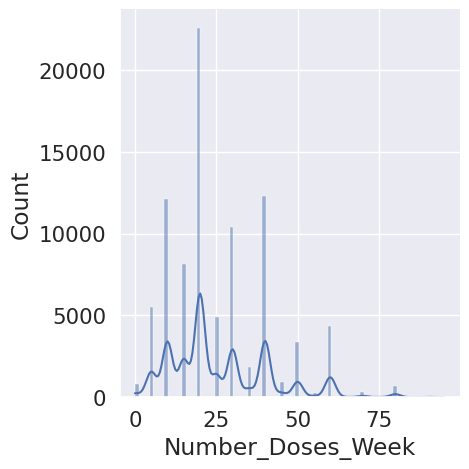

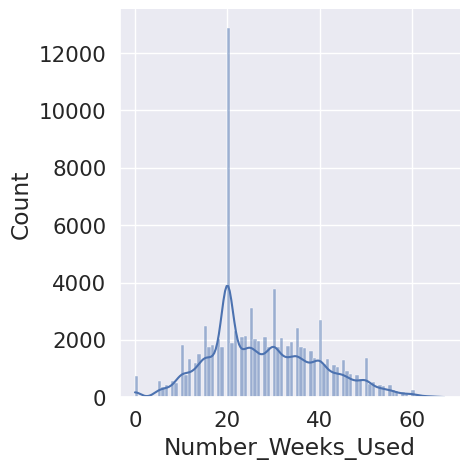

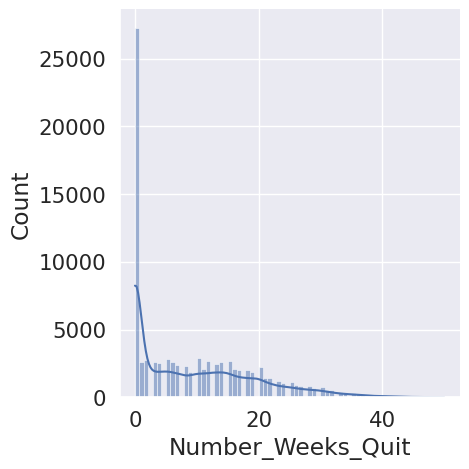

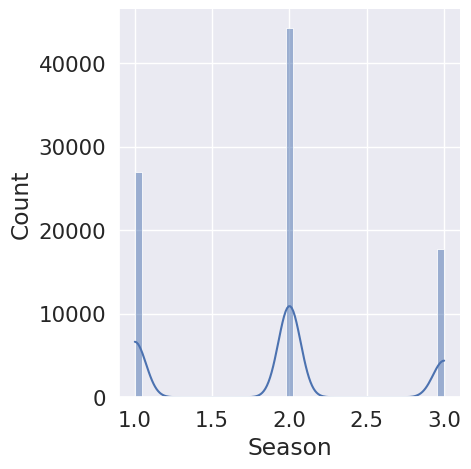

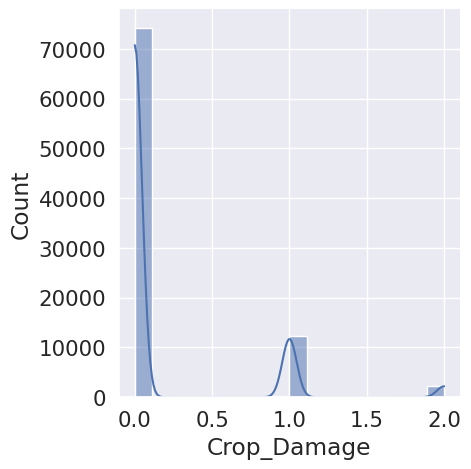

In [48]:
for i in new_df:
    sns.displot(new_df[i], kde = True)
    plt.show()

Lets try to check and remove the skewness

In [49]:
new_df.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.421001
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

In [50]:
# lets apply log transformation and treat the skewd data
for col in new_df.columns:
    if new_df.skew().loc[col]>0.55:
        new_df[col]=np.sqrt(new_df[col])

In [51]:
new_df.skew()

Estimated_Insects_Count    0.233920
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.589801
Number_Doses_Week          0.057880
Number_Weeks_Used          0.421001
Number_Weeks_Quit          0.015768
Season                     0.145228
Crop_Damage                1.919987
dtype: float64

In [52]:
#  Removing outliers

def get_iqr(feature):
    quantile1, quantile3 = np.percentile(feature, [25, 75])
    iqr_value = quantile3 - quantile1
    lower_bound = quantile1 - 1.5 * iqr_value
    upper_bound = quantile3 + 1.5 * iqr_value
    return lower_bound, upper_bound



In [53]:
lower, upper = get_iqr(new_df.Crop_Type)
outlier_condition = (new_df.Crop_Type < lower) | (new_df.Crop_Type > upper)
new_df[outlier_condition] = new_df[outlier_condition].mean()

<Axes: ylabel='Season'>

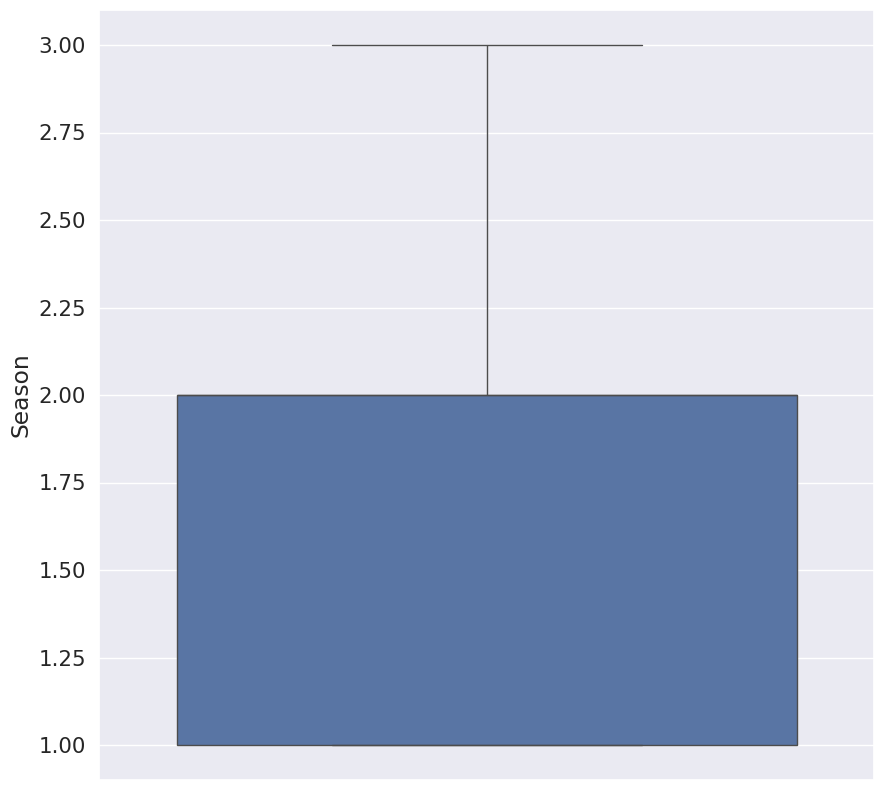

In [54]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=new_df.Season)

In [55]:
from sklearn.preprocessing import LabelEncoder
def fit_label_encoder(feature):
    le = LabelEncoder()
    le.fit(feature)
    return le

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
target_variable='Crop_Damage'

In [58]:
X = train_df[categorical_features + numerical_features].copy()
y = train_df[target_variable].copy()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    # To distribute each class in the train and test set evenly
    stratify=y,
    # Take a test size of 20%
    test_size=0.2,
    # Set a seed so that we can reproduce the result
    random_state=42,
)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

Let's check whether stratified split worked or not. To do that, we can check the percentage of data of each class in the train and test labels.

In [60]:
y_train_counts = y_train.value_counts()
y_train_counts / y_train_counts.sum() * 100

Crop_Damage
0.000000    83.546690
1.000000    13.850829
1.414214     2.602482
Name: count, dtype: float64

In [61]:
y_test_counts = y_test.value_counts()
y_test_counts / y_test_counts.sum() * 100

Crop_Damage
0.000000    83.547153
1.000000    13.847625
1.414214     2.605222
Name: count, dtype: float64

In [62]:
# gender_encoder = fit_label_encoder(X_train["Season"])
# X_train["Season"] = gender_encoder.transform(X_train["Season"])
# X_test["Season"] = gender_encoder.transform(X_test["Season"])

# marital_status_encoder = fit_label_encoder(X_train["Crop_Type"])
# X_train["Crop_Type"] = marital_status_encoder.transform(X_train["Crop_Type"])
# X_test["Crop_Type"] = marital_status_encoder.transform(X_test["Crop_Type"])


# residence_location_encoder = fit_label_encoder(X_train["Soil_Type"])
# X_train["Soil_Type"] = residence_location_encoder.transform(X_train["Soil_Type"])
# X_test["Soil_Type"] = residence_location_encoder.transform(X_test["Soil_Type"])


In [63]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)


In [64]:
lr.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
pred=lr.predict(X_test)

In [ ]:
lr.score(X_test,y_test)

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [67]:
random = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = param_grid, cv = 3, verbose = 2,
                  n_jobs = -1 )

In [68]:
random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END C=206.913808111479, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or None penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1182, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet.")
ValueError: l1_ratio must be specified when penalty is elasticnet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1209, in fit
    check_classification_targets(y)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/utils/multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'l2'} or None. Got 'none' instead.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/ubuntu/dataScienceAndMachineLearning/venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'elasticnet', 'l1'} or None. Got 'none' instead.


In [69]:
print (f'Accuracy - : {random.score(X_test,y_test):.3f}')

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [70]:
predictions = random.predict(X_test)
sns.distplot(y_test - predictions)


NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.